In [44]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import copy

PyTorch version: 2.3.0.dev20231230+rocm5.7
Torchvision version: 0.18.0.dev20231230+rocm5.7
CUDA is available: True


Some ideas for the accumulation approximation method.

i) count the numbers of pixels that aren't black.

ii) unsupervised image clustering

iii) image comparison with opencv (correlation factor ?)

iv) gray-scale

v) VGG16 Deep Learning Model

vi) Histogram-Based Approache (open-cv)

vii) Structural Similarity Index (SSIM) sk-image

viii) Siamese networks 

ix) anomaly detection that asks for human verification

## Histogram

In [45]:
import cv2
from skimage.metrics import structural_similarity as compare_ssim

# Load the images
img1 = cv2.imread('mod_images/SAMPhoto_Moncouche_HD_2024_02_29_08_00_20.jpg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('mod_images/SAM_Photo_Moncouche_HD_2024_01_05_08_00_22.jpg')
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3 = cv2.imread('mod_images/SAM_Photo_Moncouche_HD_2023_12_26_03_03_58.jpg')
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img4 = cv2.imread('mod_images/SAM_Photo_Moncouche_HD_2023_12_12_16_00_29.jpg') 
img4_gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

# Calculate the histograms, set bin for (255, 255, 255) to 0, and normalize them
hist_img1 = cv2.calcHist([img1], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
hist_img1[0, 0, 0] = 0
cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist_img2 = cv2.calcHist([img2], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
hist_img2[0, 0, 0] = 0


hist_img3 = cv2.calcHist([img3], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
hist_img3[0, 0, 0] = 0
cv2.normalize(hist_img3, hist_img3, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

hist_img4 = cv2.calcHist([img4], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
hist_img3[0, 0, 0] = 0
cv2.normalize(hist_img4, hist_img4, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Find the metric value
metric_val_12 = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_CORREL)
metric_val_13 = cv2.compareHist(hist_img1, hist_img3, cv2.HISTCMP_CORREL)
metric_val_14 = cv2.compareHist(hist_img1, hist_img4, cv2.HISTCMP_CORREL)
print(metric_val_12)
print(metric_val_13) #this is not the expected behaviour
print(metric_val_14) # this is not the expected behaviour

0.7357491174188653
0.9173464151298958
0.0010822449728066306


## SSIM

In [46]:
(score12, diff12) = compare_ssim(img1_gray, img2_gray, full=True)
diff12 = (diff12 * 255).astype("uint8")
print("SSIM: {}".format(score12)) # expected


(score13, diff13) = compare_ssim(img1_gray, img3_gray, full=True)
diff13 = (diff13 * 255).astype("uint8")
print("SSIM: {}".format(score13)) # unexcpected behaviour


(score14, diff14) = compare_ssim(img1_gray, img4_gray, full=True)
diff1 = (diff14 * 255).astype("uint8")
print("SSIM: {}".format(score14)) # expected behaviour


SSIM: 0.8946120364060286
SSIM: 0.9656893069843496
SSIM: 0.9764254945218586


### Correlation coefficient

In [47]:
from skimage import io, feature
import numpy as np

corr_12 = cv2.filter2D(img1_gray, ddepth=-1, kernel=img2_gray)
print(corr_12)

[[ 76  38  38 ... 255 255 255]
 [ 76 114  76 ... 255 255 255]
 [  0  13   0 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...  37  33  34]
 [255 255 255 ...   0   0   0]]


### CLustimage

In [53]:
# Load library
from clustimage import Clustimage

In [54]:
# Initialize with HOG
#cl = Clustimage(method='hog', embedding='tsne', dim = (512,512),grayscale=True, params_hog={'orientations':1, 'pixels_per_cell':(16,16), 'cells_per_block':(1,1)})

# Initialize with pca and 50 PCs
#cl = Clustimage(method='pca', params_pca={'n_components':50})
# Take the number of components that covers 95% of the data
cl = Clustimage(method='pca',embedding='tsne',dirpath='./out',store_to_disk=True, dim=(256, 256), params_pca={'n_components':0.95})
#cl = Clustimage(method='pca',dim=(128, 128), params_hog={'orientations':20, 'pixels_per_cell':(8,8), 'cells_per_block':(1,1)}, params_pca={'n_components':0.6})



In [55]:
from os import listdir
from os.path import isfile, join
mypath = "../modv2_moncouche_HD/"

In [56]:
results = cl.fit_transform(mypath, cluster='kmeans', metric = 'euclidean', cluster_space='high', min_clust=6, max_clust=9)

[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Extracting images from: [../modv2_moncouche_HD/]
[clustimage] >INFO> [2202] files are collected recursively from path: [../modv2_moncouche_HD/]
[clustimage] >INFO> [2202] images are extracted.
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Reading and checking images.
[clustimage]: 100%|██████████| 2202/2202 [01:36<00:00, 22.75it/s]
[clustimage] >INFO> Extracting features using method: [pca]
[clustimage] >INFO> Extracted features using [pca]: samples=2202, features=110
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.
[clustimage] >INFO> Saving data in memory.
[clustimage] >INFO> Fit with method=[kmeans], metric=[euclidean], linkage=[ward]
[clustimage] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]
[clustimage] >INFO> Optimal number clusters detecte

In [57]:
print(results['feat'])
print(results['pathnames'])
print(results['labels'])
print(results['feat'][0].shape)

[[-2.56008909e+02 -5.95223707e+03  2.23325346e+03 ... -1.39401987e+02
   2.07654917e+02  2.15431539e+02]
 [ 2.64790398e+03 -6.14021772e+03  2.31847376e+03 ...  1.67844726e+02
   9.39329168e+01  6.66373300e+01]
 [-1.00726880e+03  3.26270285e+03 -6.25722885e+02 ...  2.92663883e+00
   1.06028753e+02 -5.35550715e+01]
 ...
 [ 4.66487224e+03  6.91799664e+03  1.60088379e+03 ... -6.65207695e+02
   5.54801512e+02 -4.59252967e+02]
 [-5.30808364e+03  9.44814344e+02  1.93654130e+02 ... -6.92645438e+01
  -1.82006947e+01  5.54253022e+00]
 [-8.71956459e+03  2.59876252e+03  1.60891318e+01 ...  1.66119556e-01
   4.78089962e+01  7.54103946e+01]]
['../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2023_12_12_14_00_21.jpg'
 '../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2023_12_30_07_01_51.jpg'
 '../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2024_01_13_20_41_23.jpg'
 ...
 '../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2024_01_22_01_04_00.jpg'
 '../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2024_02_01_22_03_50.jpg'

[clustimage] >INFO> Add transparency to RGB colors (last column)
[clustimage] >INFO> Create scatterplot


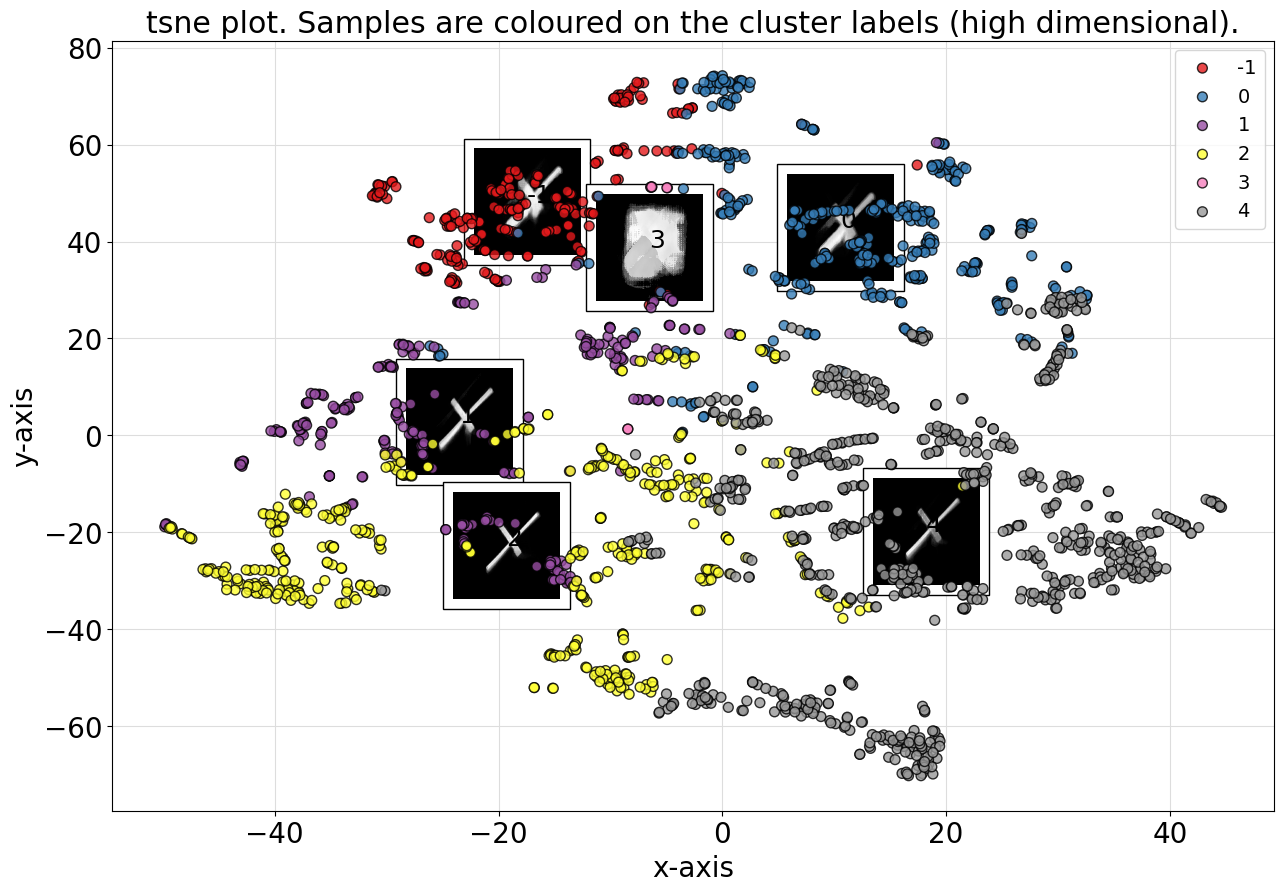

<Figure size 640x480 with 0 Axes>

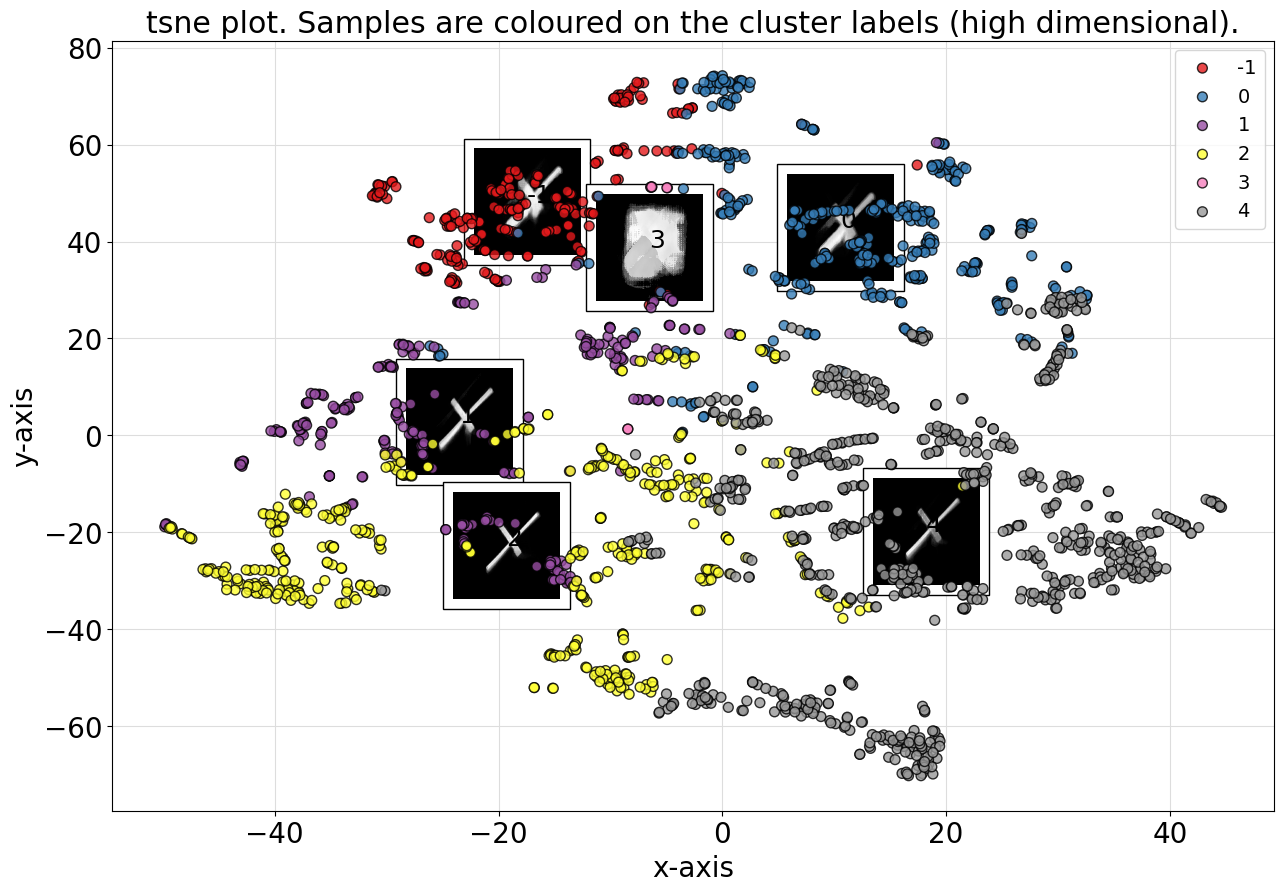

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 640x480 with 0 Axes>

In [58]:
# Scatter
cl.scatter(dotsize=50, zoom=0.3)
cl.scatter(dotsize=50, zoom=0.3, img_mean=True)
#cl.scatter(dotsize=50, zoom=0.3, img_mean=False)
#cl.scatter(zoom=0.3, plt_all=True, figsize=(100,100))

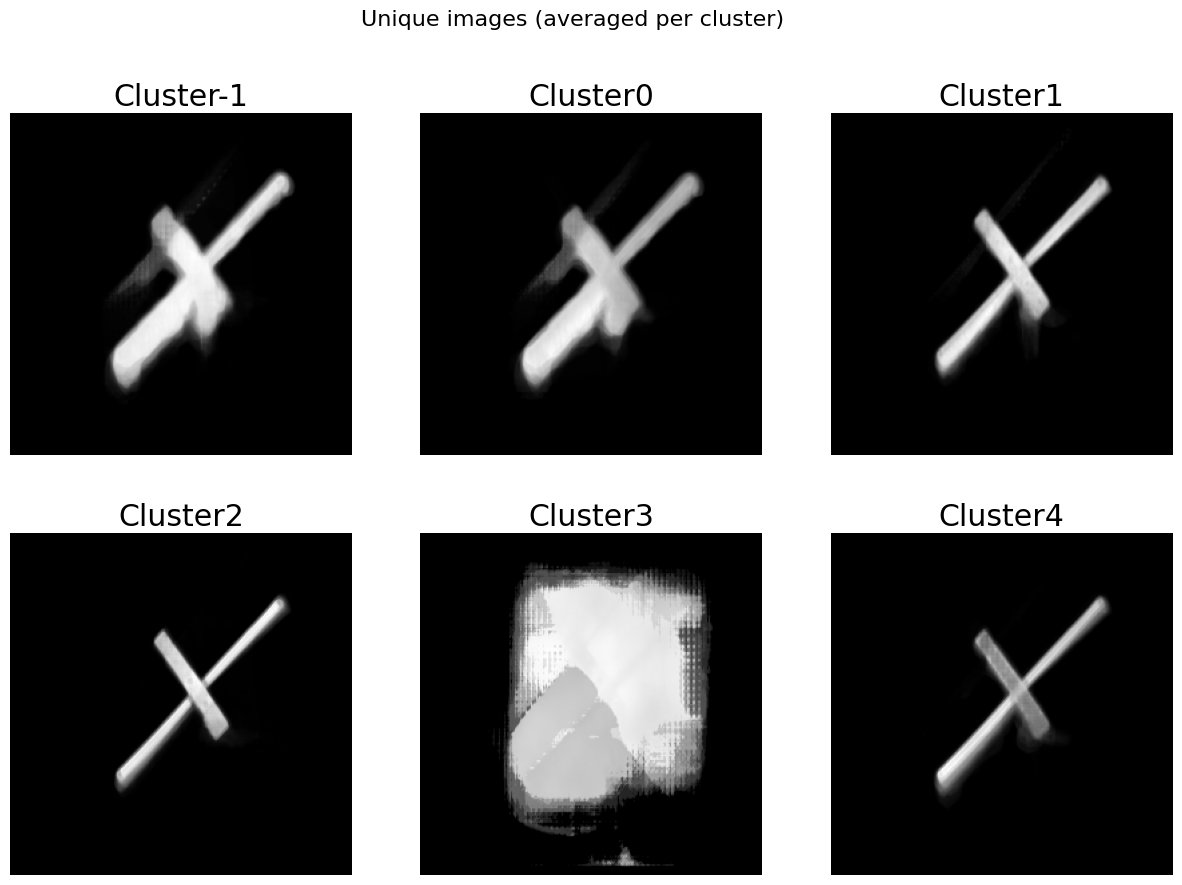

In [59]:
cl.plot_unique()

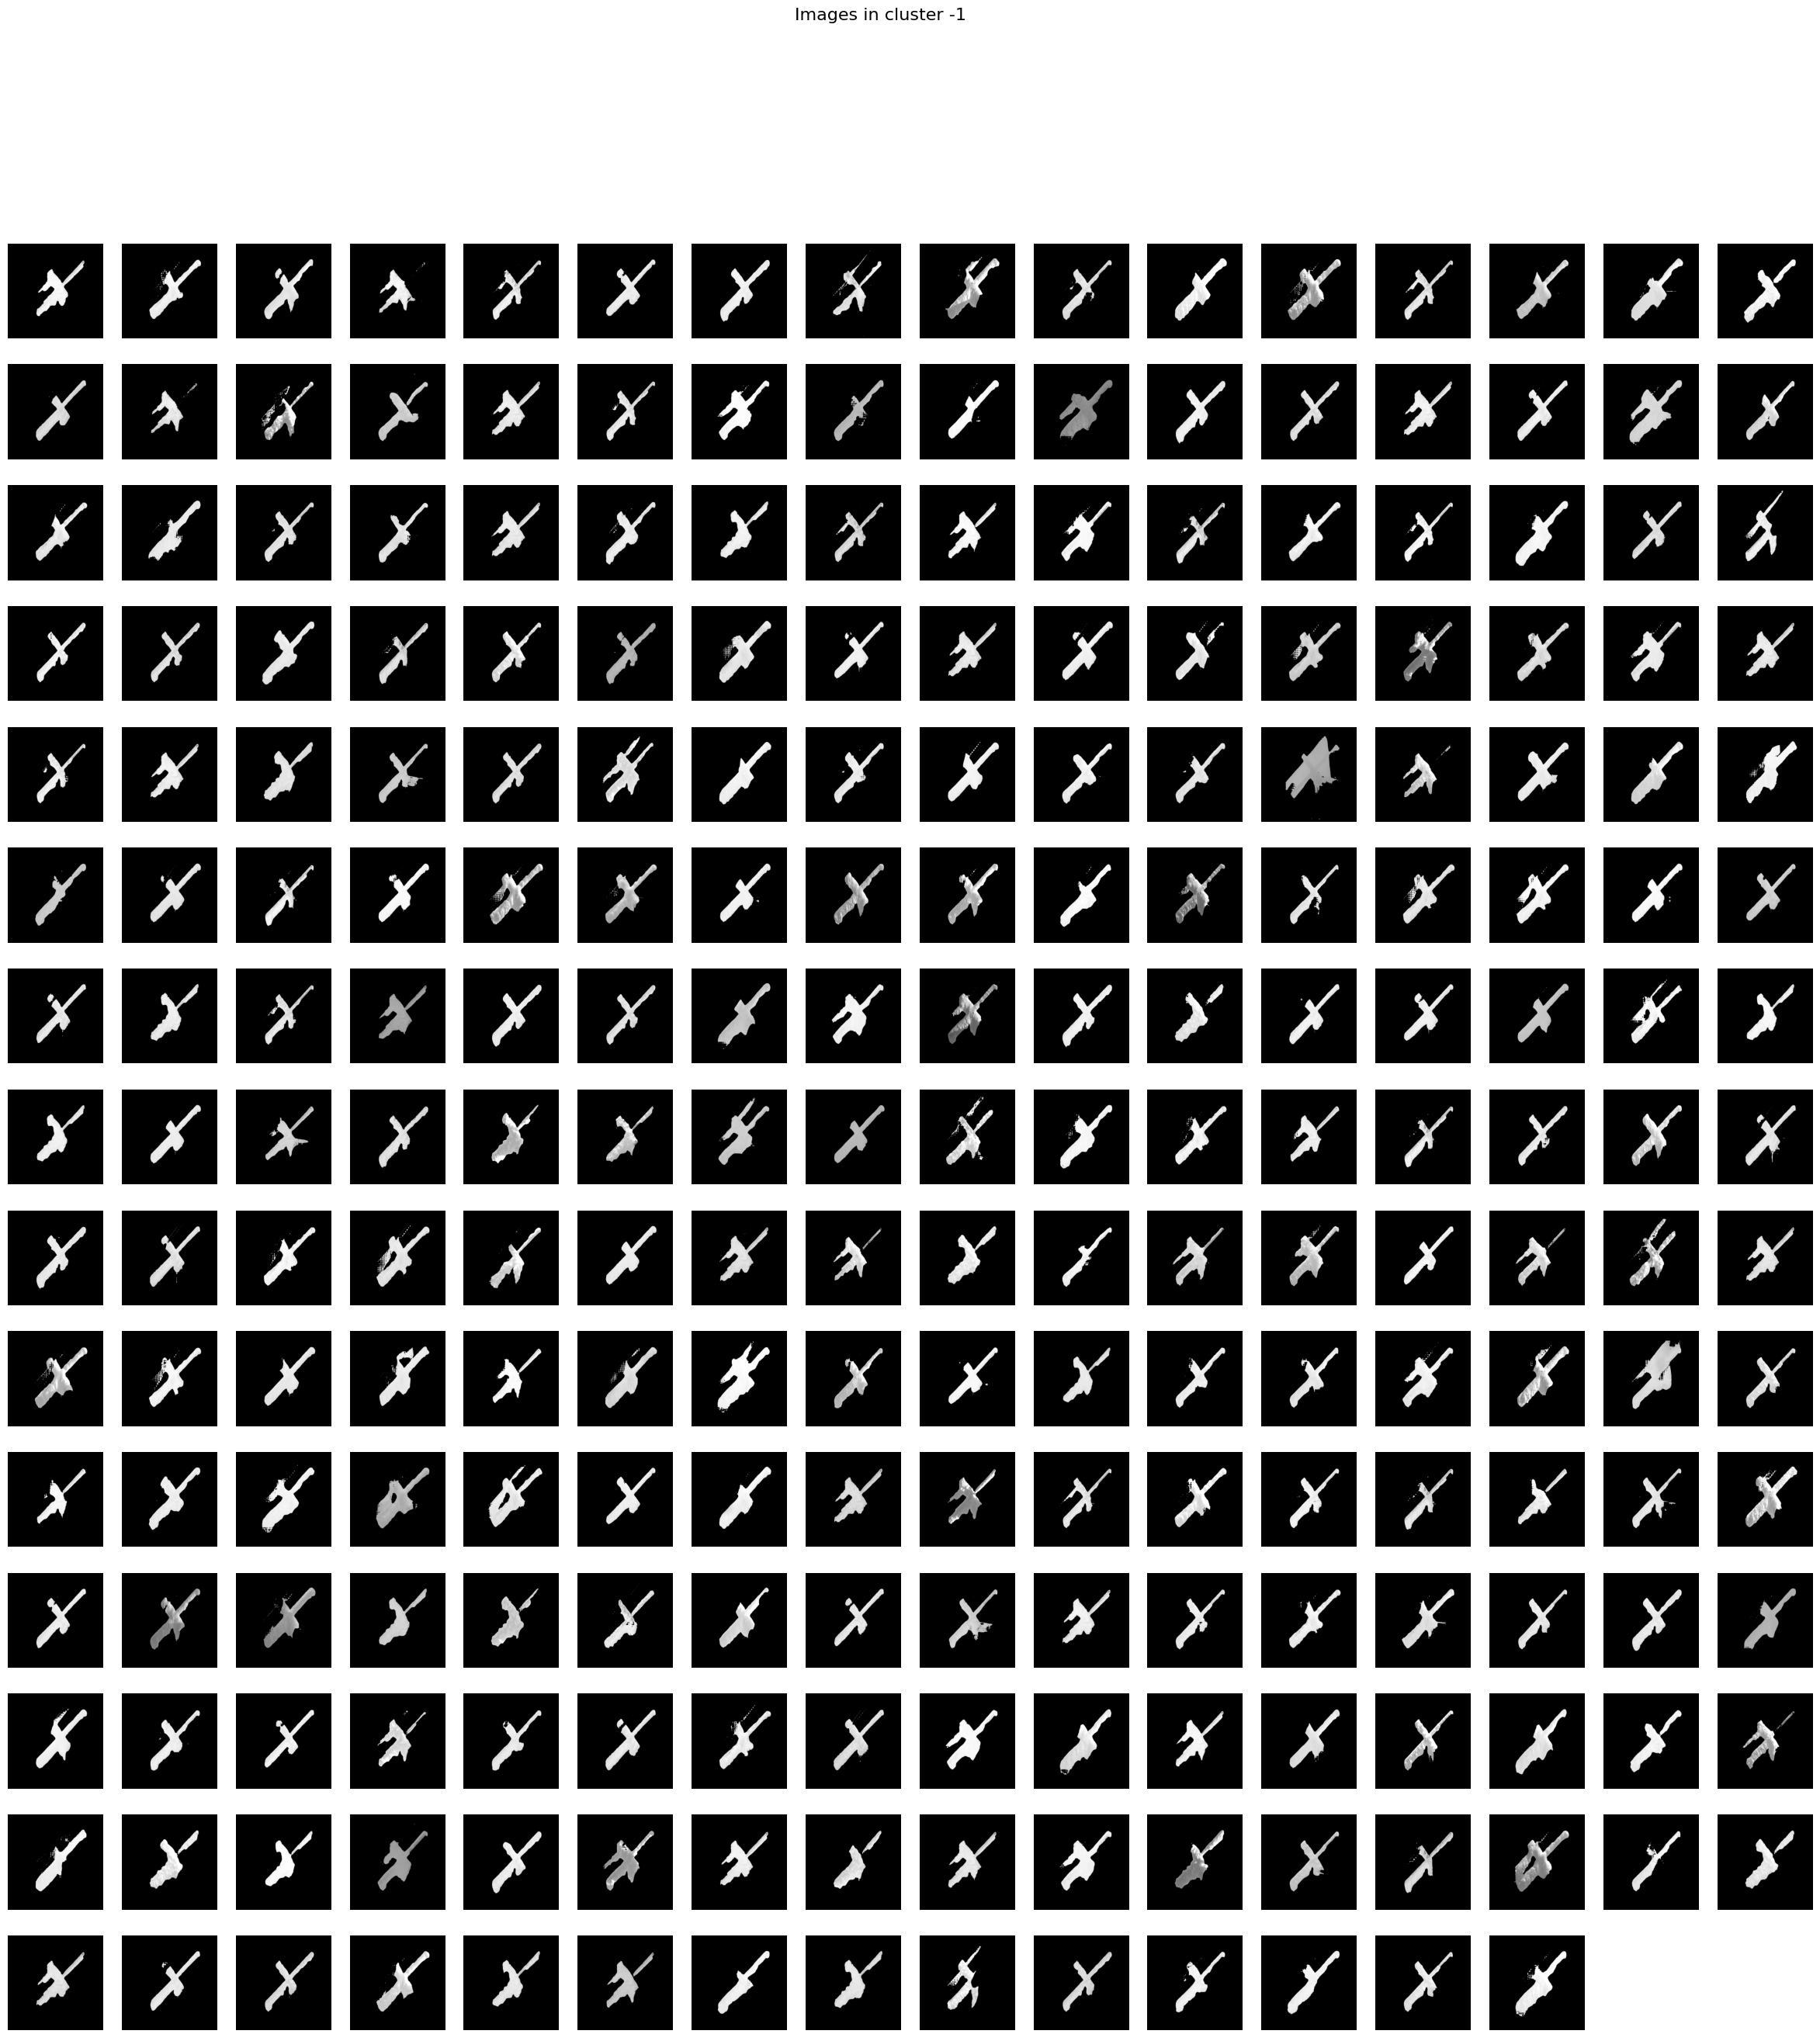

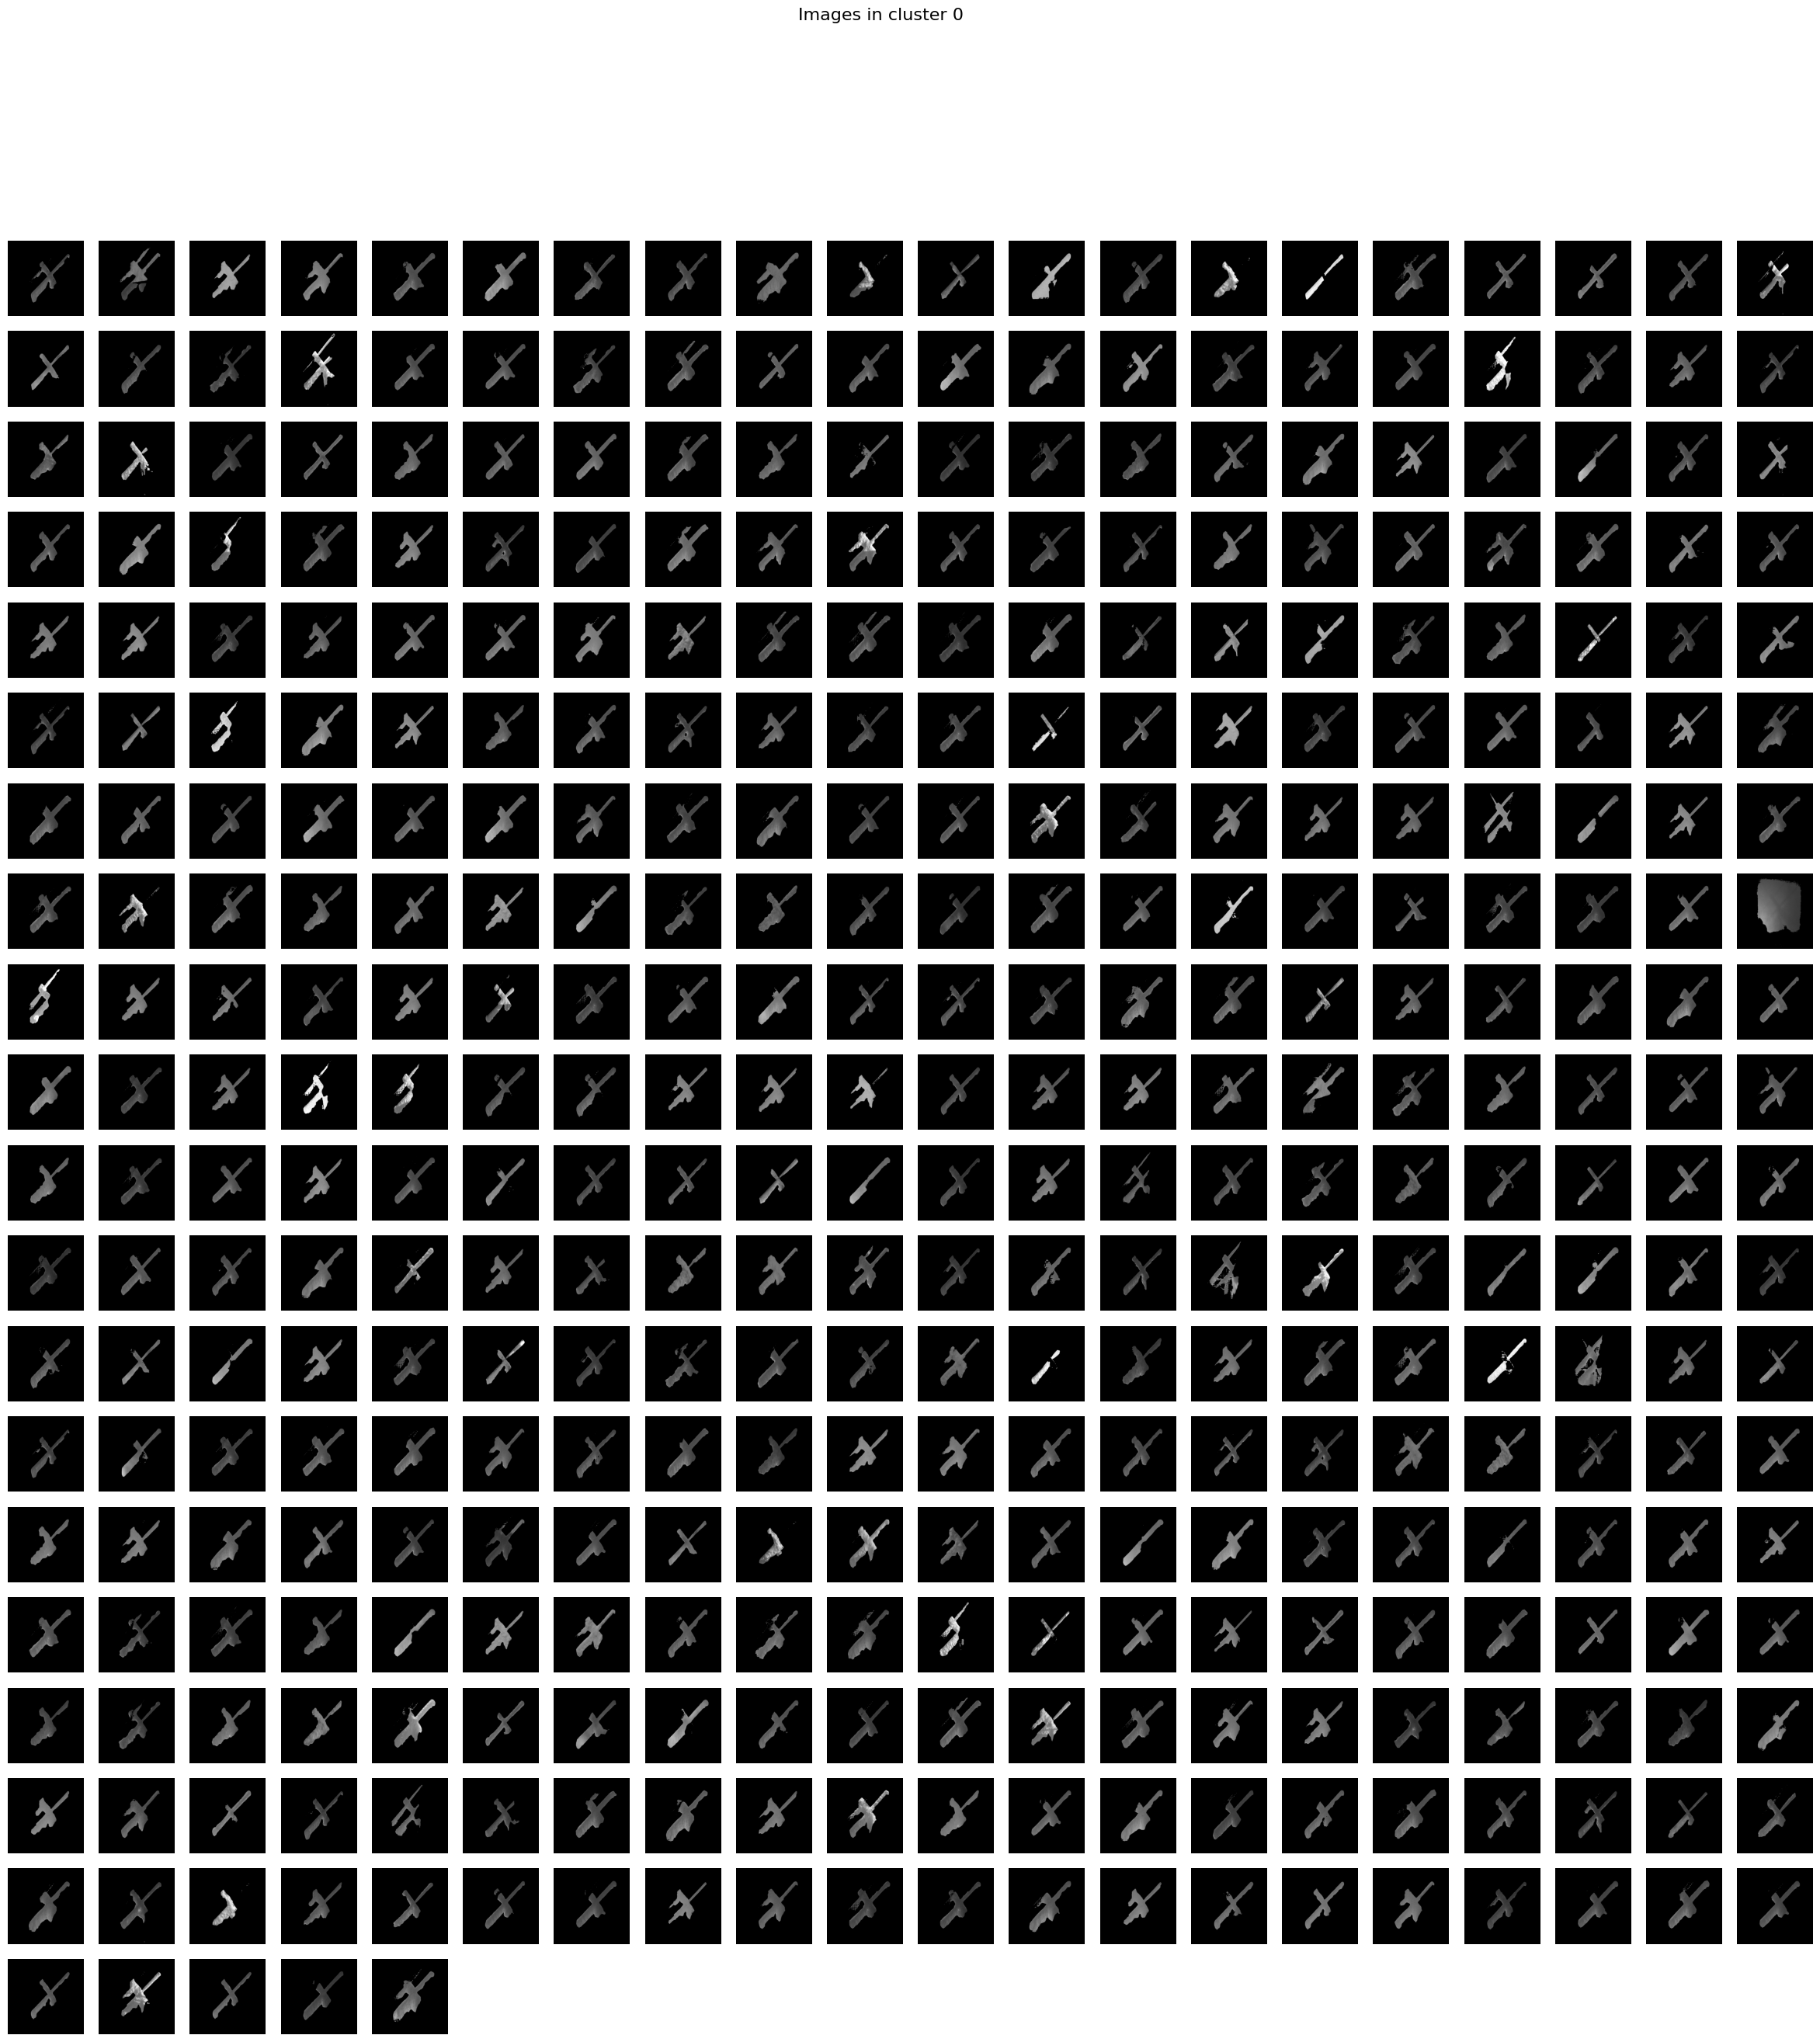

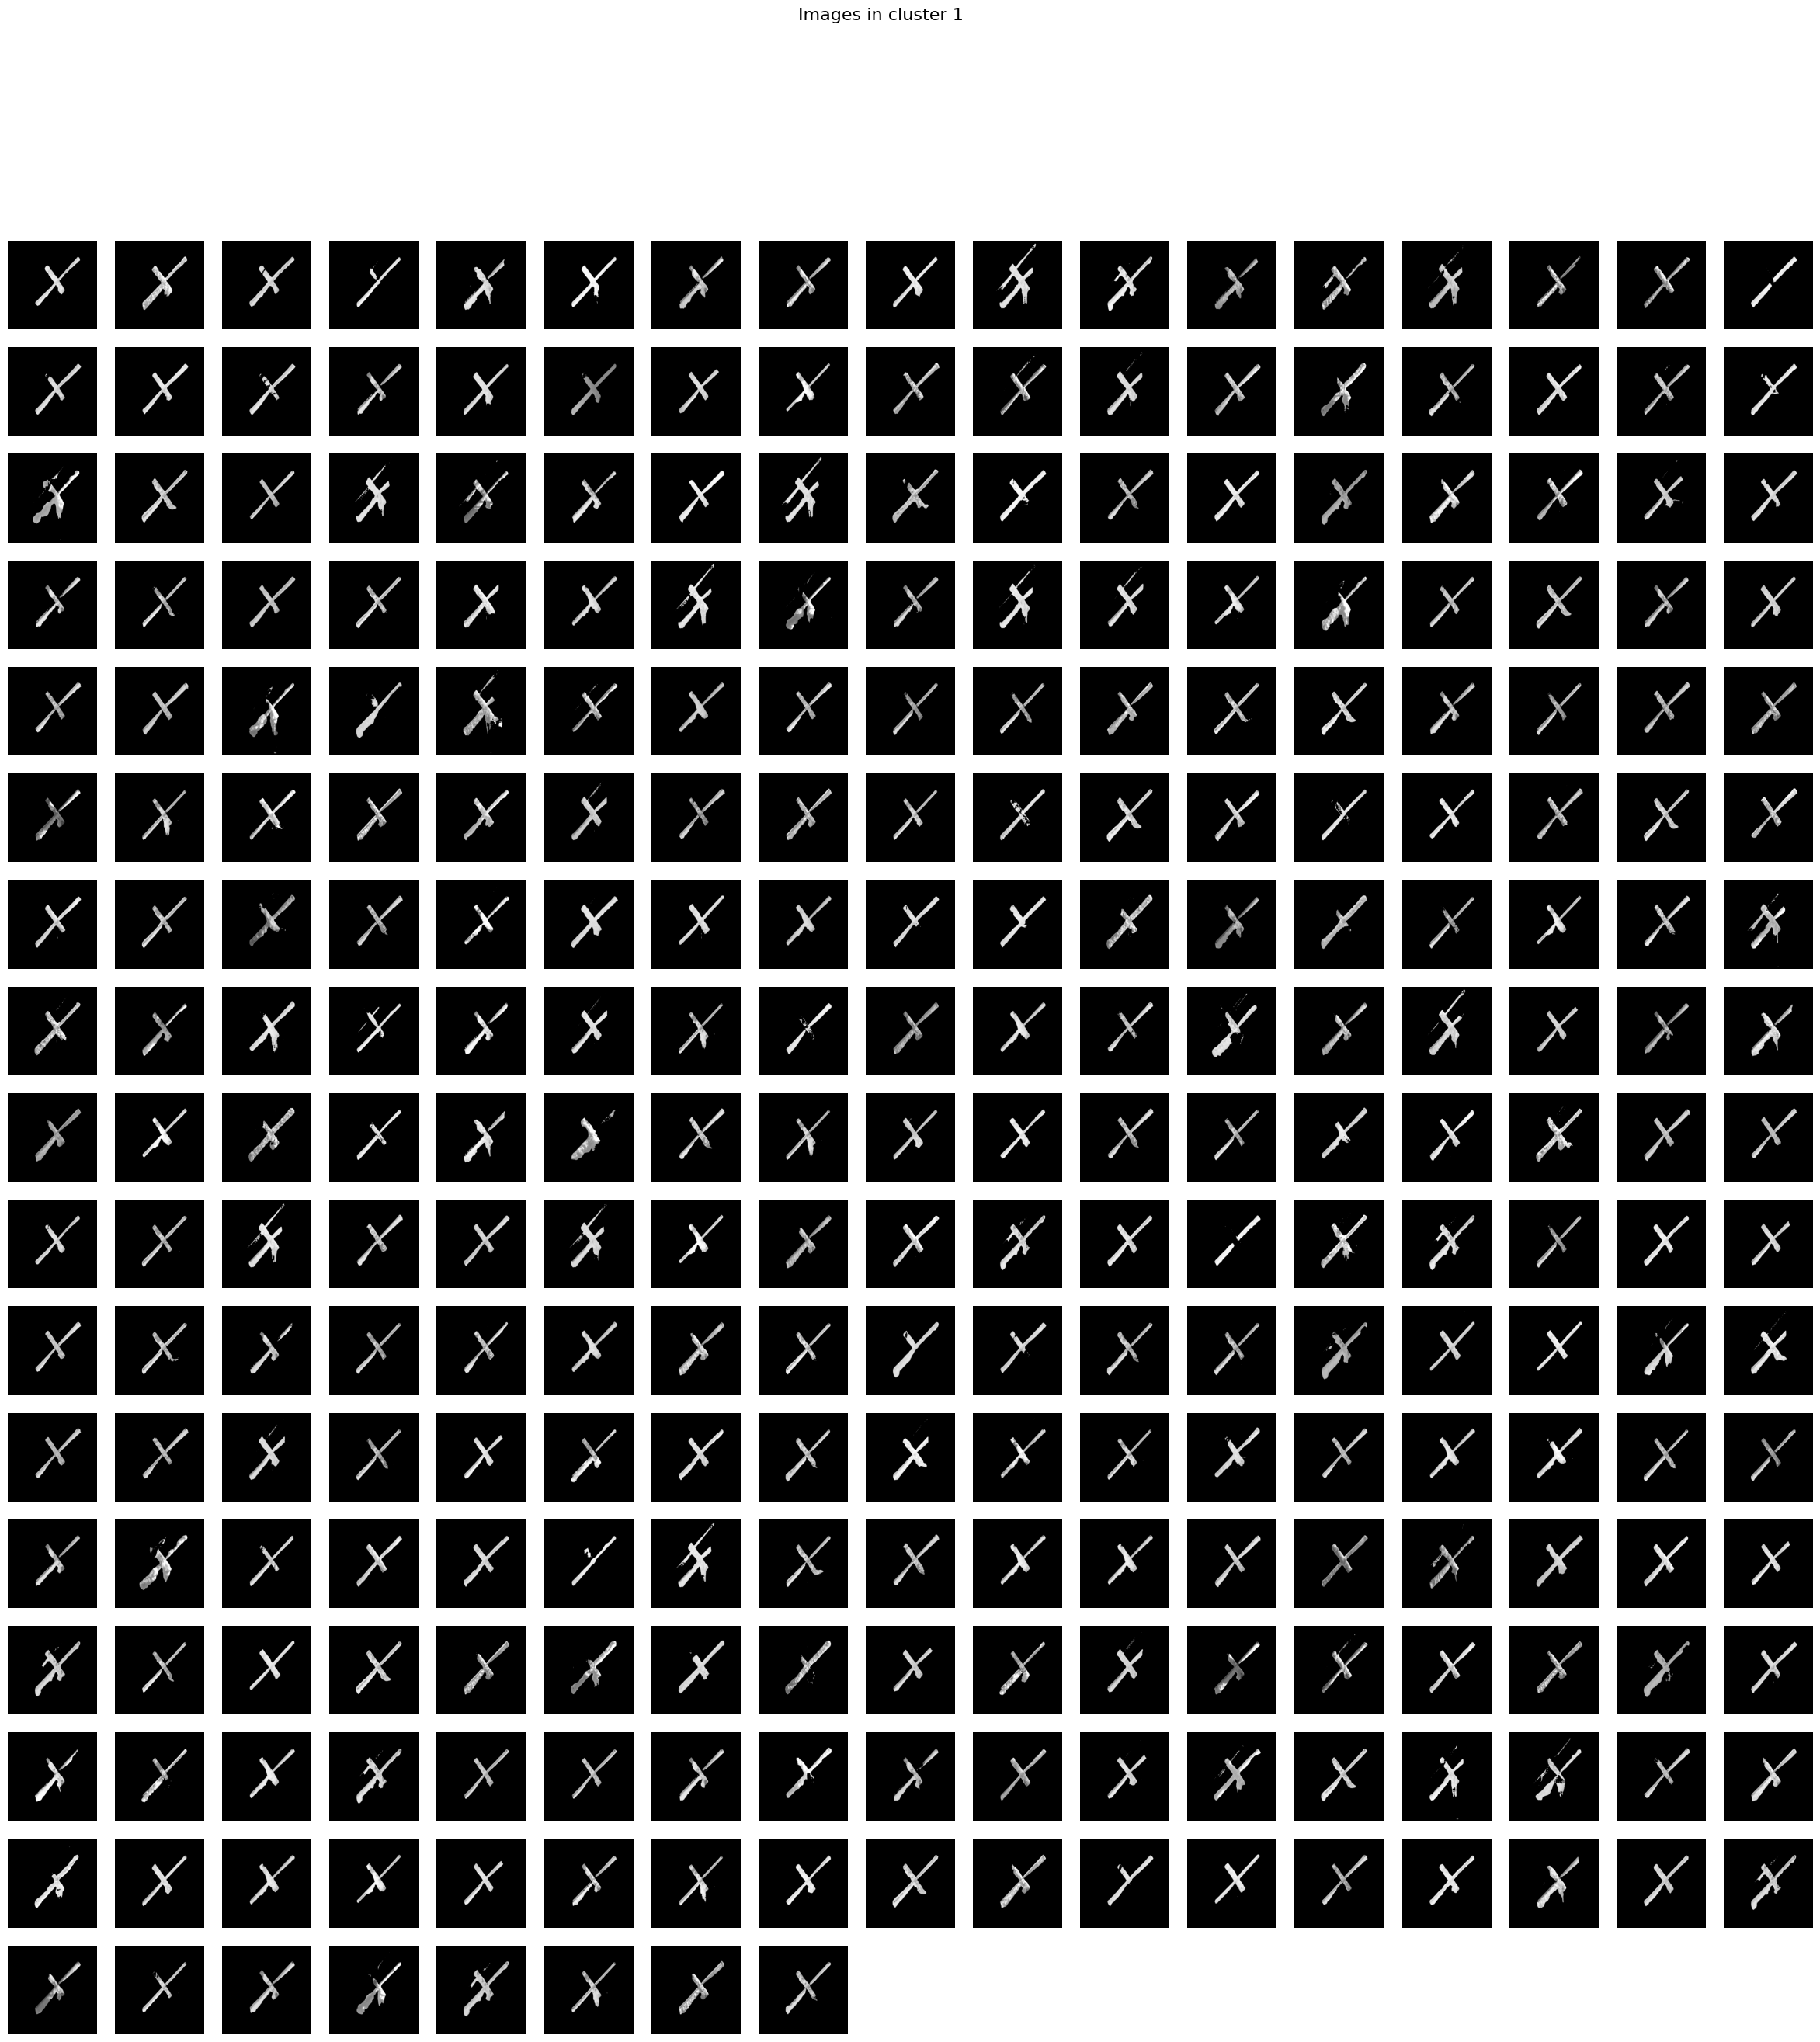

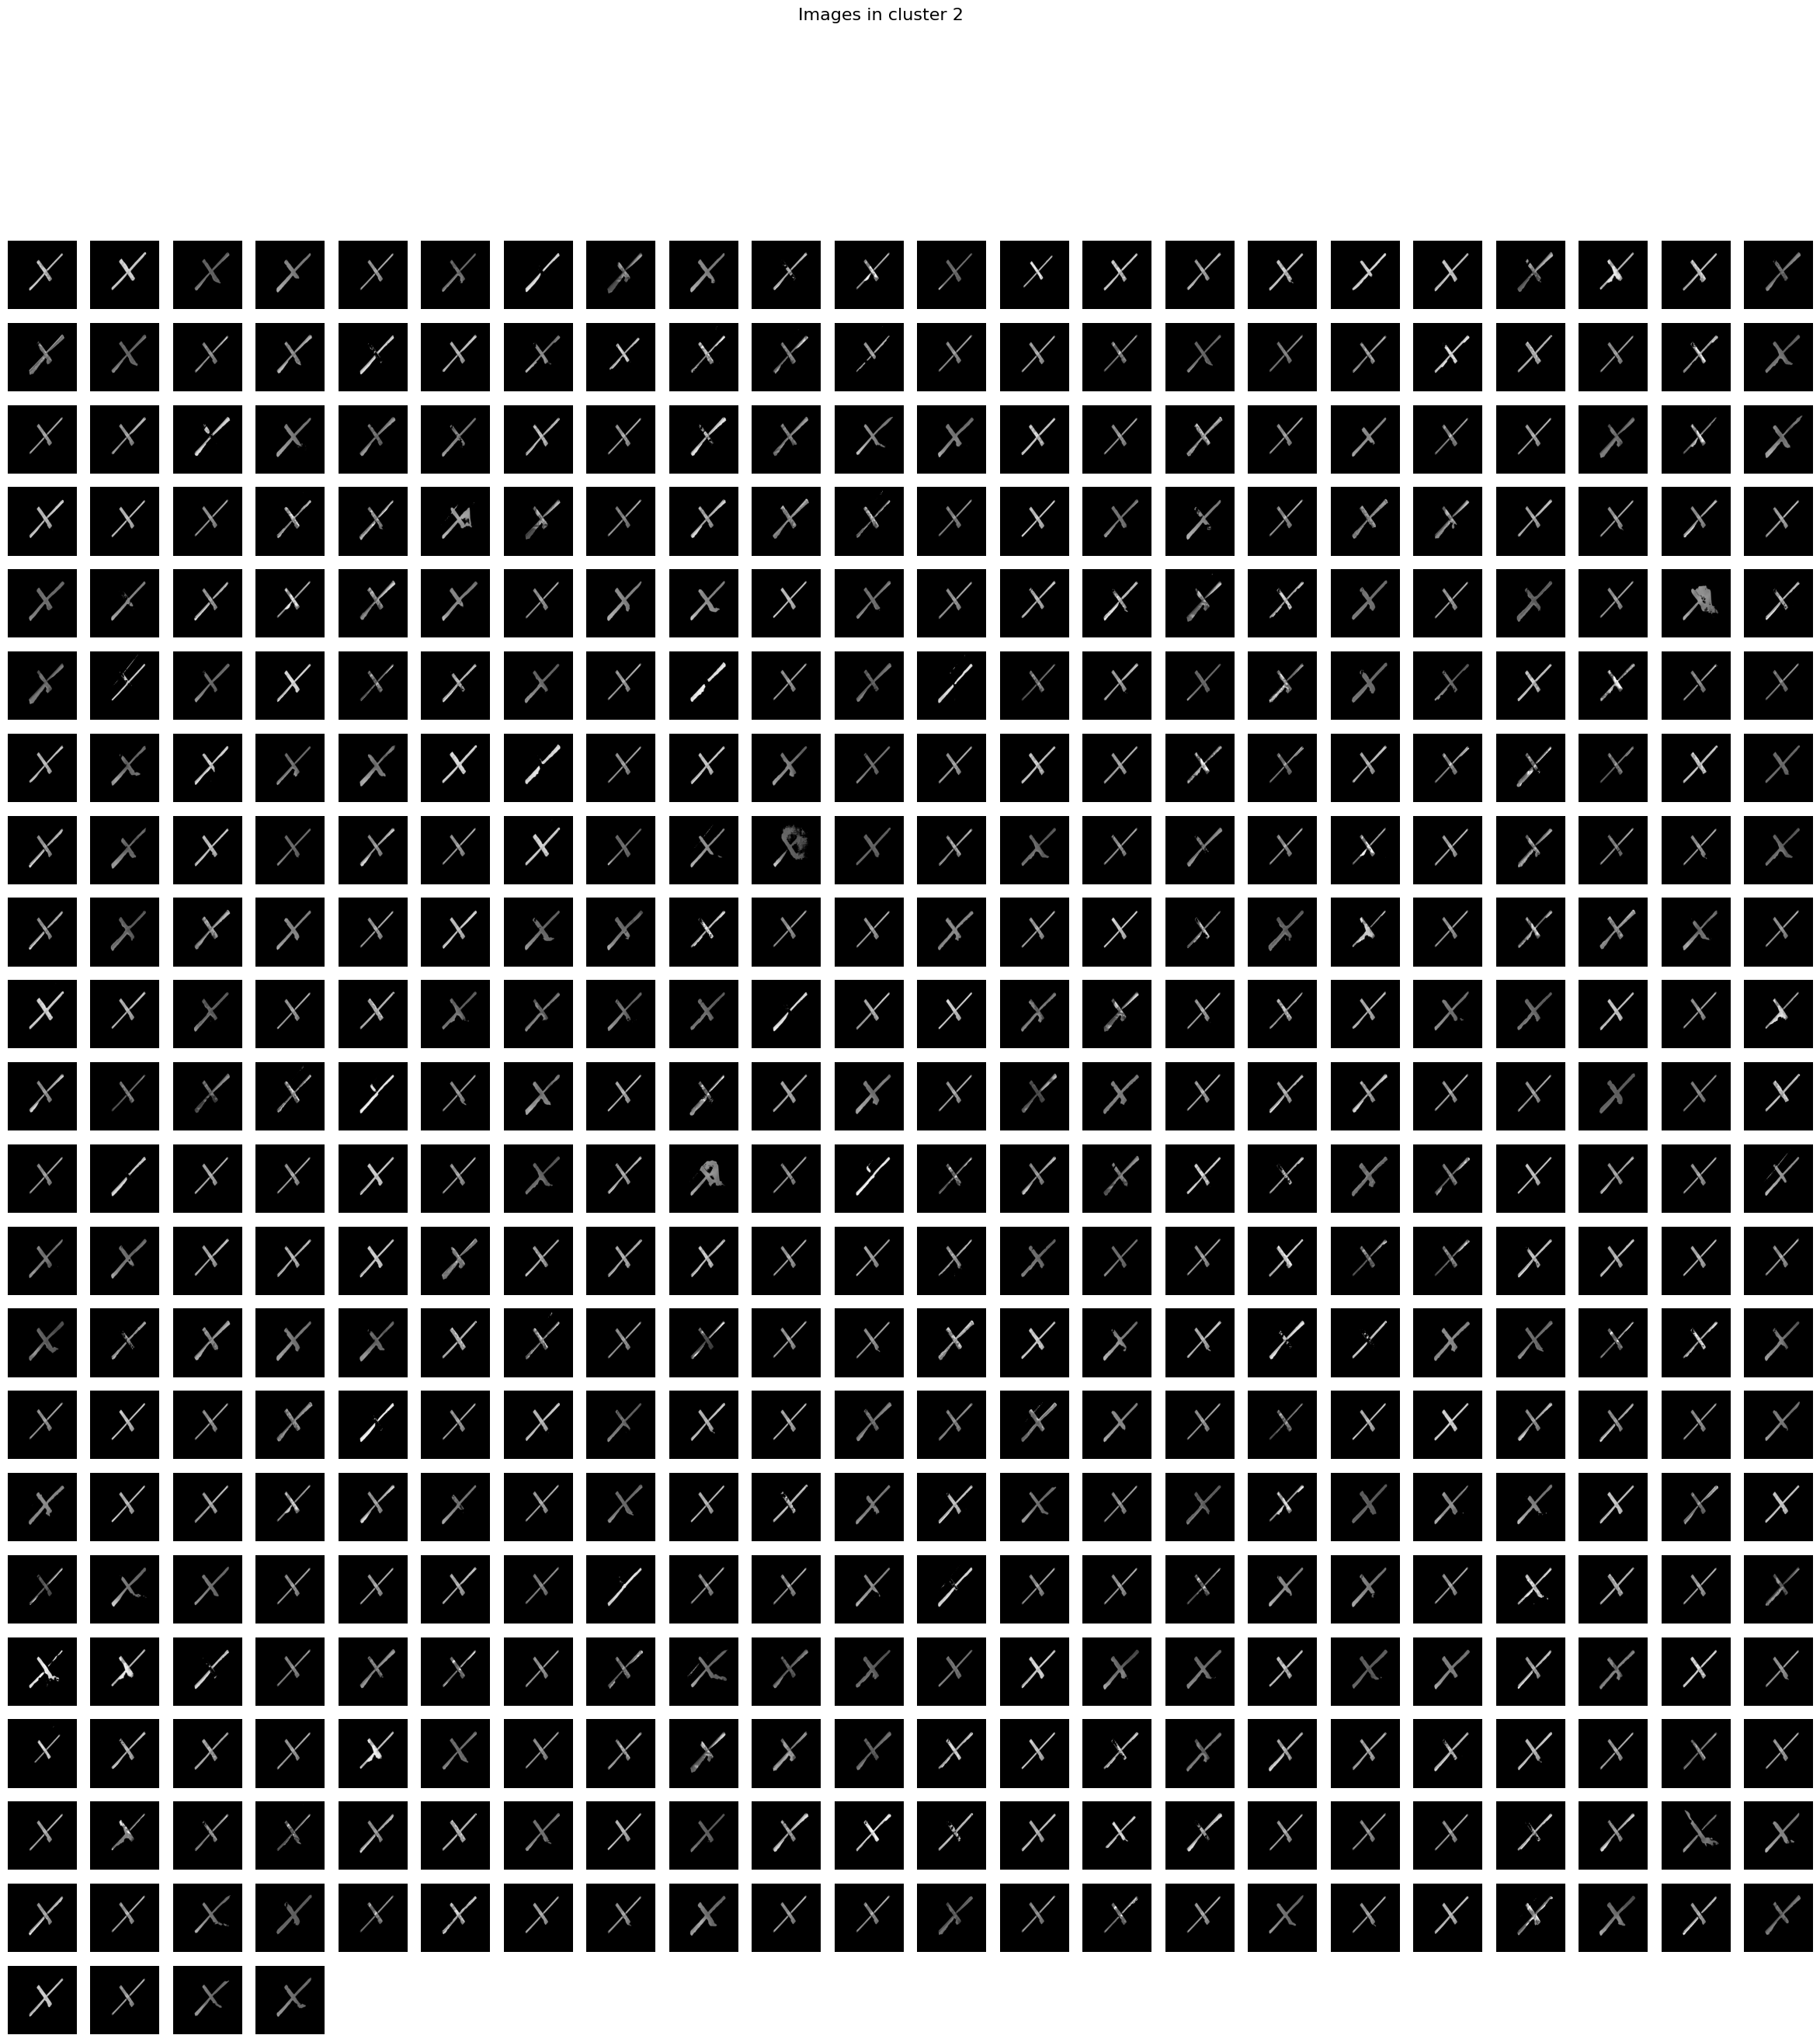

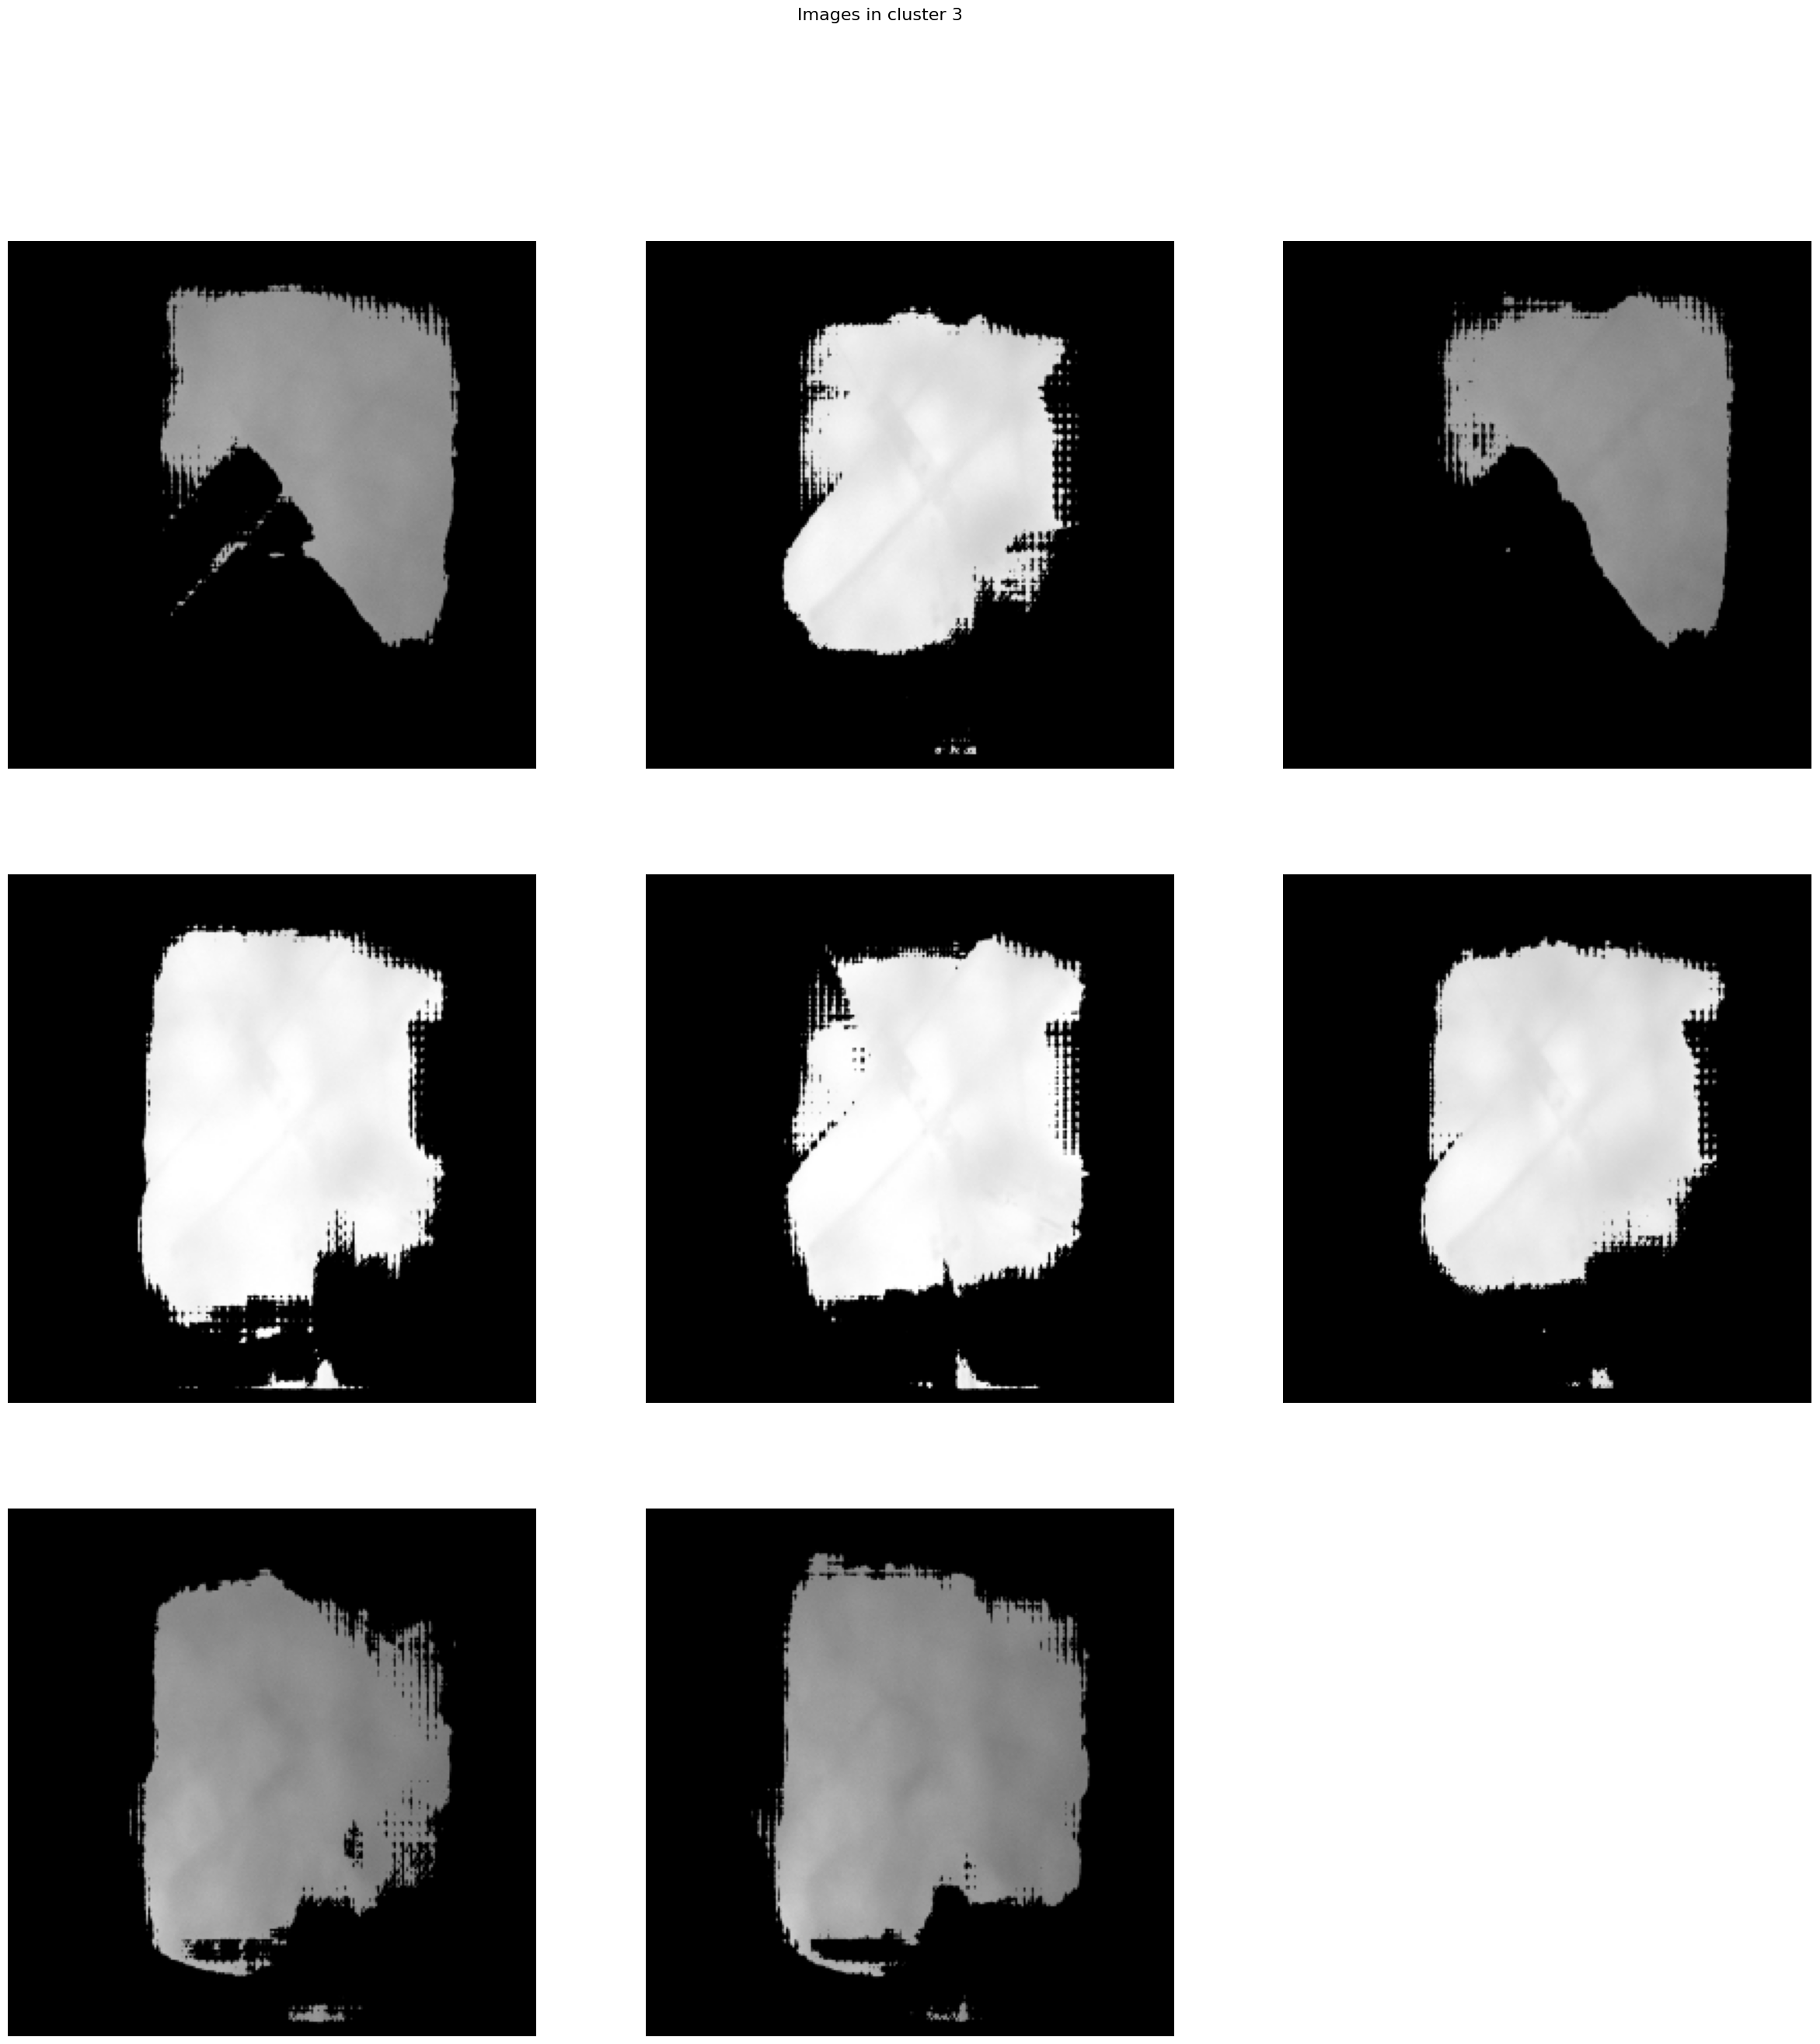

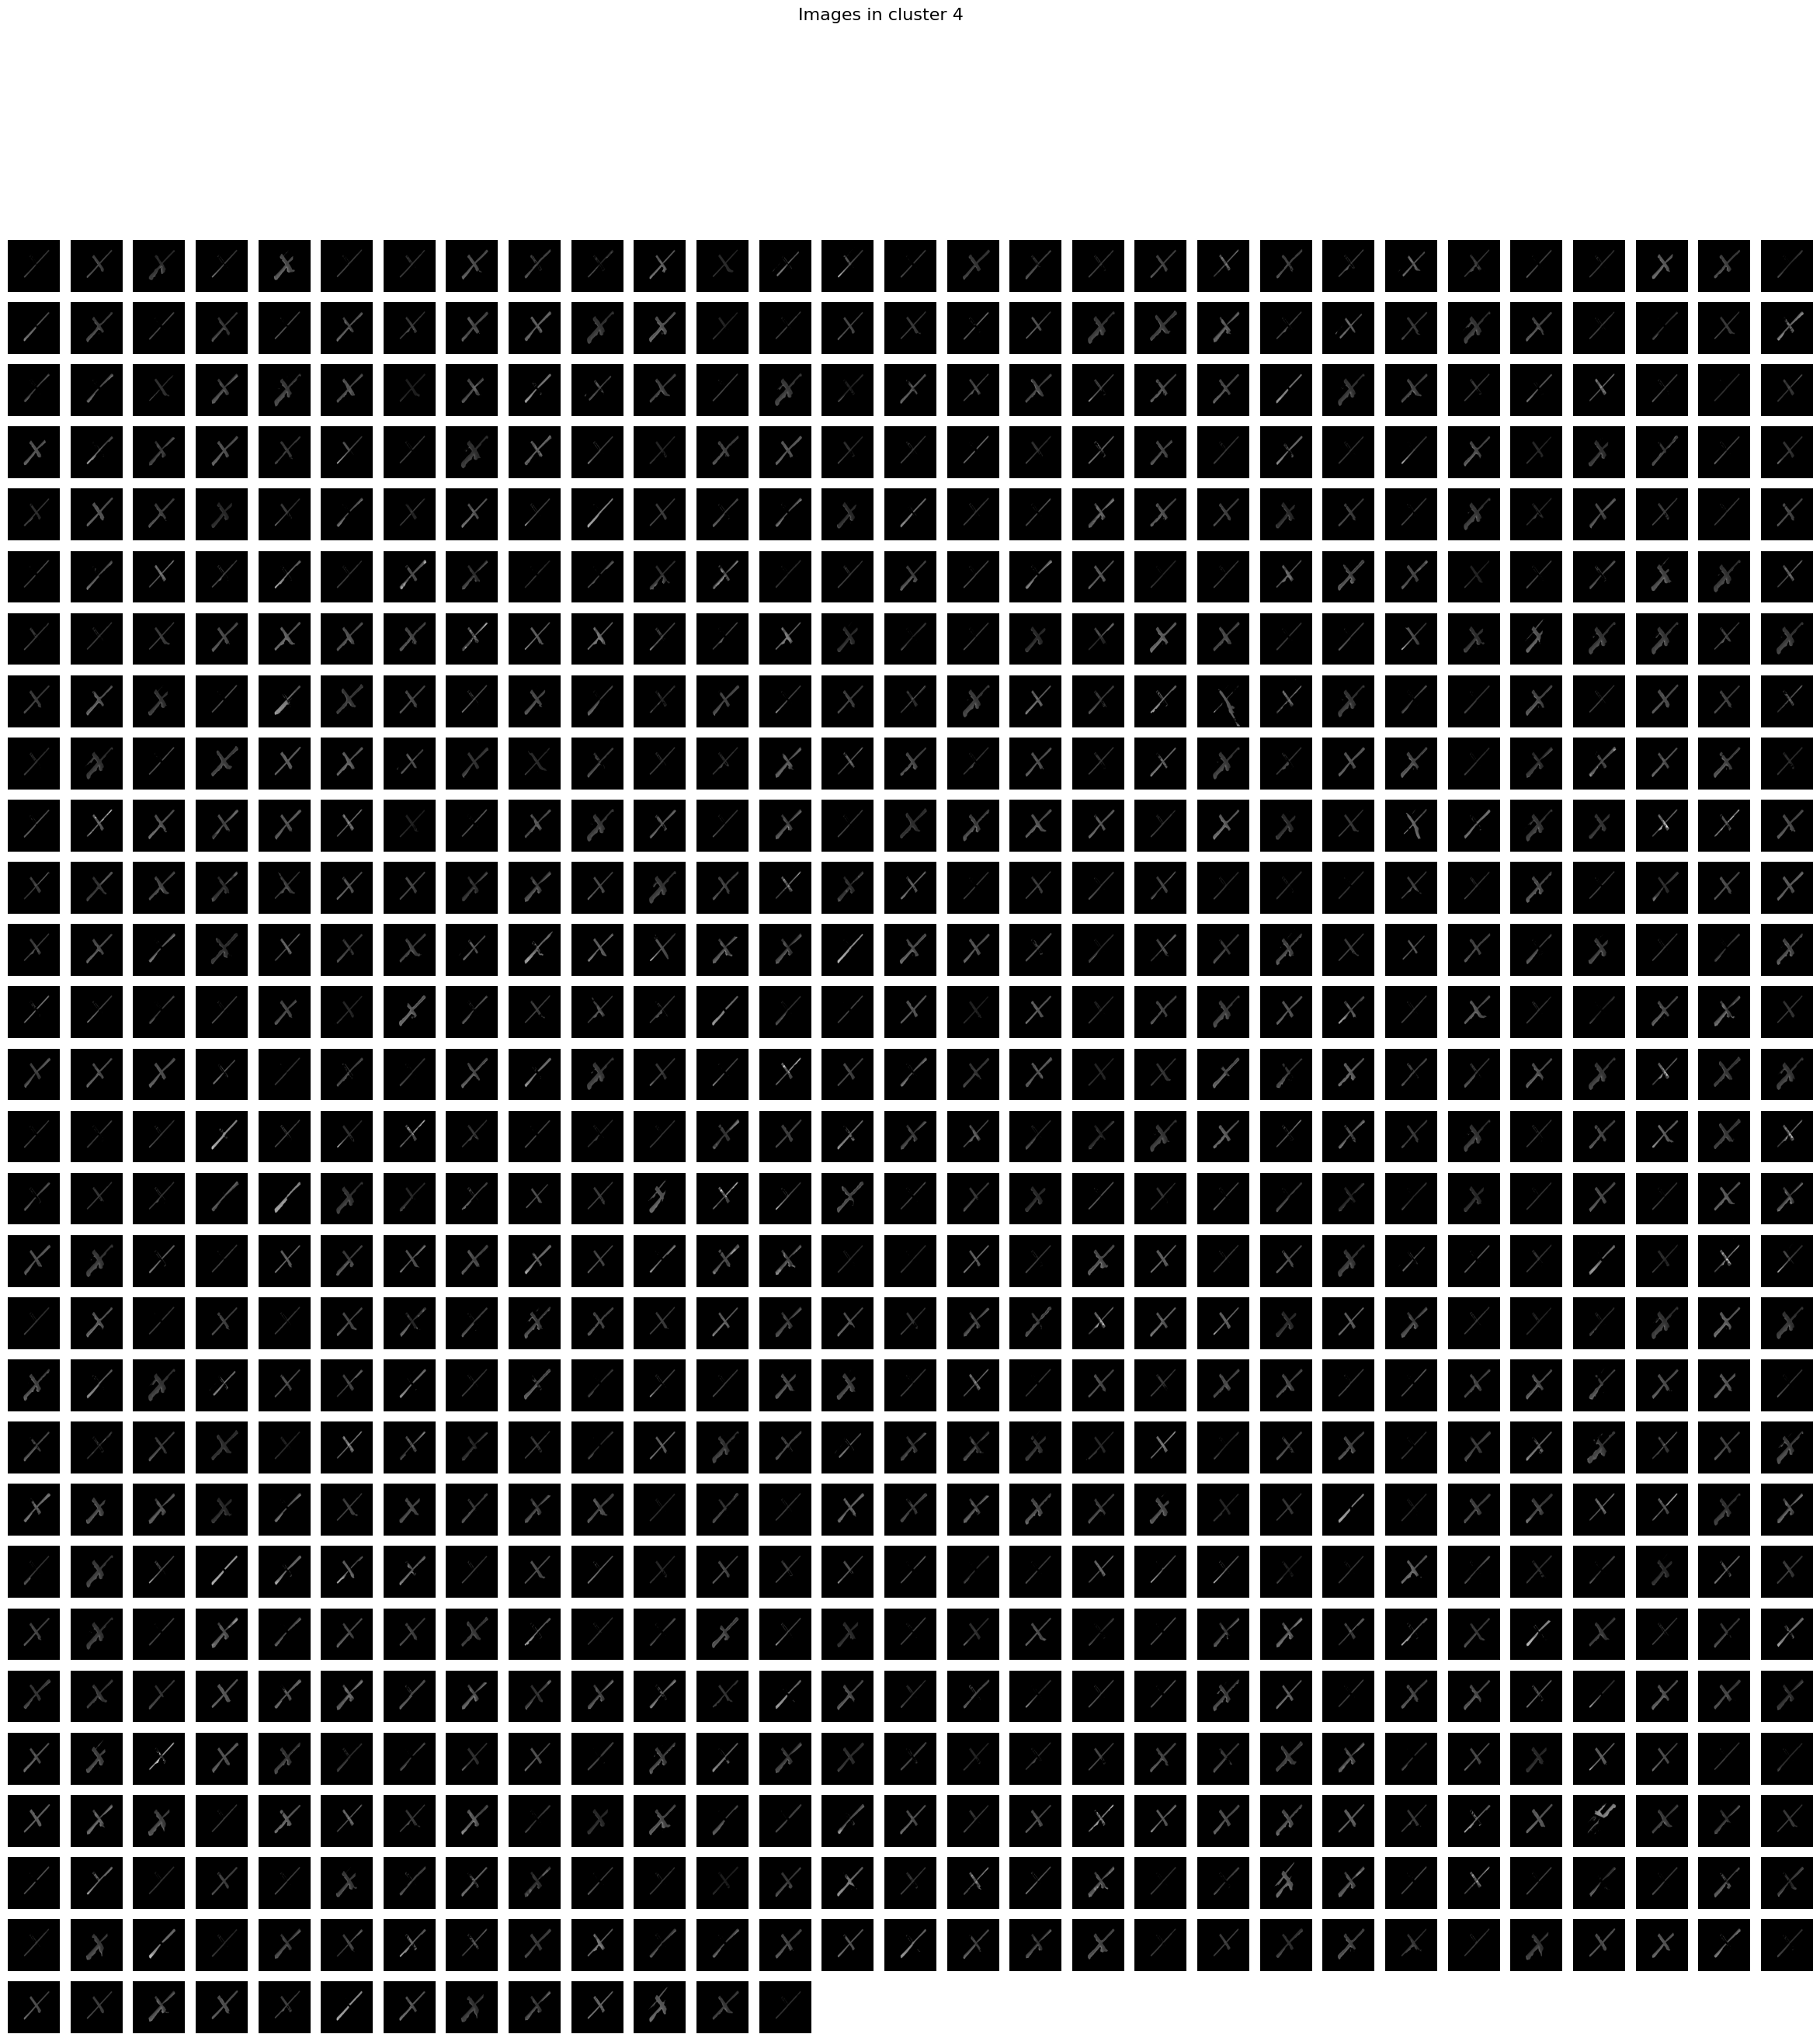

In [60]:
# Plot clustered images
for i in np.arange(-1,8,1):
    cl.plot(labels=i, figsize=(30,30))



In [61]:
success = cl.save(filepath='./out/backup_clustimage', overwrite=True)
print(success)

[pypickle] Pickle file saved: [./out/backup_clustimage.pkl]
True


# Load



In [62]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import copy
# Load library
from clustimage import Clustimage

PyTorch version: 2.3.0.dev20231230+rocm5.7
Torchvision version: 0.18.0.dev20231230+rocm5.7
CUDA is available: True


In [63]:
cl = Clustimage(method='pca',embedding='tsne',dirpath='./out',store_to_disk=True, dim=(256, 256), params_pca={'n_components':0.95})
cl.load(filepath='./out/backup_clustimage.pkl')
results = cl.results

[pypickle] Pickle file loaded: [./out/backup_clustimage.pkl]


[clustimage] >INFO> Load succesful!


X : [str of list] or [np.array].
            The input can be:
                * "c://temp//" : Path to directory with images
                * ['c://temp//image1.png', 'c://image2.png', ...] : List of exact pathnames.
                * [[.., ..], [.., ..], ...] : np.array matrix in the form of [sampels x features]
        cluster : str, (default: 'agglomerative')
            Type of clustering.
                * 'agglomerative'
                * 'kmeans'
                * 'dbscan'
                * 'hdbscan'
        evaluate : str, (default: 'silhouette')
            Cluster evaluation method.
                * 'silhouette'
                * 'dbindex'
                * 'derivative'
        metric : str, (default: 'euclidean').
            Distance measures. All metrics from sklearn can be used such as:
                * 'euclidean'
                * 'hamming'
                * 'cityblock'
                * 'correlation'
                * 'cosine'
                * 'jaccard'
                * 'mahalanobis'
                * 'seuclidean'
                * 'sqeuclidean'
        linkage : str, (default: 'ward')
            Linkage type for the clustering.
                * 'ward'
                * 'single'
                * 'complete'
                * 'average'
                * 'weighted'
                * 'centroid'
                * 'median'
        min_clust : int, (default: 3)
            Number of clusters that is evaluated greater or equals to min_clust.
        max_clust : int, (default: 25)
            Number of clusters that is evaluated smaller or equals to max_clust.
        cluster_space: str, (default: 'high')
            Selection of the features that are used for clustering. This can either be on high or low feature space.
                * 'high' : Original feature space.
                * 'low' : Input are the xycoordinates that are determined by "embedding". Thus either tSNE coordinates or the first two PCs or HOGH features.
        black_list : list, (default: None)
            Exclude directory with all subdirectories from processing.
            * example: ['undouble']


# Separate the images into their own classes:

In [64]:
print(results['pathnames'].shape)
print(results['labels'].shape)

classes = np.unique(results['labels'])
k = len(classes)

print(classes, k)

one_hot = []
for elem in results['labels']:
    cluster = np.where(classes == elem)[0][0]
    # print(cluster)
    one_hot_lab = np.zeros_like(classes)
    one_hot_lab[cluster] = 1
    one_hot.append(one_hot_lab)

one_hot = (np.array(one_hot))

(2202,)
(2202,)
[-1  0  1  2  3  4] 6


In [65]:
from sklearn.model_selection import train_test_split

X_train,X_val, Y_train, Y_val = train_test_split(results['pathnames'],one_hot, test_size= 0.3, random_state=42)

In [66]:
print(X_train)

['../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2023_12_09_08_00_22.jpg'
 '../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2023_12_21_23_04_00.jpg'
 '../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2024_01_26_00_04_00.jpg'
 ...
 '../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2023_11_26_19_03_41.jpg'
 '../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2023_12_19_11_00_21.jpg'
 '../modv2_moncouche_HD/SAM_Photo_Moncouche_HD_2023_12_05_07_00_22.jpg']


In [67]:
print(Y_train)

print(type(X_train[0]))

[[0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 1 0 0 0 0]
 ...
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]]
<class 'numpy.str_'>


In [68]:
class CustomImageDataset(torch.utils.data.Dataset):
    def __init__(self, img_list, labels, transformations = None, original:bool = False):
        super(CustomImageDataset, self).__init__()
        self.img_list = img_list
        self.labels = labels
        self.og = original
        self.transformations = transformations

    def __len__(self):
        return len(self.img_list)

    def __getitem__(self, idx):
        image_filepath = self.img_list[idx]
        og_filepath = image_filepath.replace("modv2_moncouche_HD", "moncouche_HD").replace("SAM_", "")
        image = torchvision.io.read_image(image_filepath) if self.og==False else torchvision.io.read_image(og_filepath)
        resize = torchvision.transforms.Resize((256,256))
       
        image = resize(image)
        image = torch.tensor(image, dtype=torch.float32)
        
        if self.transformations is not None:
            image = self.transformations(image=image)["image"]
        
        lab = self.labels[idx]
        return image, torch.tensor(lab, dtype=torch.float32)

In [69]:

import torchvision.models as models
import torch
import torch.nn as nn


 
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=(3,3), stride=1, padding=1)  # Update input channels to 3 for RGB images
        self.act1 = nn.ReLU()
        self.drop1 = nn.Dropout(0.05)
 
        self.conv2 = nn.Conv2d(32, 32, kernel_size=(3,3), stride=1, padding=1)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2))
 
        self.flat = nn.Flatten()
 
        self.fc3 = nn.Linear(524288, 512)  # Adjust input size based on image dimensions
        self.act3 = nn.ReLU()
        self.drop3 = nn.Dropout(0.05)
        self.fc4 = nn.Linear(512, 256)
        self.act4 = nn.ReLU()
        self.fc5 = nn.Linear(256, num_classes)
        
        self.act5 = nn.Sigmoid()
        
    def forward(self, x):
        # input 3x32x32, output 32x32x32
        x = self.act1(self.conv1(x))
        x = self.drop1(x)
        # input 32x32x32, output 32x32x32
        x = self.act2(self.conv2(x))
        # input 32x32x32, output 32x16x16
        x = self.pool2(x)
        # input 32x16x16, output 8192
        x = self.flat(x)

        x = self.act3(self.fc3(x))
        x = self.drop3(x)
        x = self.fc4(x)
        x = self.act4(x)
        x = self.fc5(x)
        x = self.act5(x)
        
        return x
    
# Define the Convolutional Neural Network architecture
#class CNN(nn.Module):
#    def __init__(self, num_classes):
#        super(CNN, self).__init__()
#        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
#        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
#        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
#        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
#        self.fc1 = nn.Linear(64 * 16 * 16, 512)  # Adjusted based on 128x128 images
##        self.fc2 = nn.Linear(512, 256)
 #       self.fc3 = nn.Linear(256, num_classes)  # Output 6 values for 6 classes
 #       self.dropout = nn.Dropout(0.5)
        
#    def forward(self, x):
 #       x = self.pool(torch.relu(self.conv1(x)))
  #      x = self.pool(torch.relu(self.conv2(x)))
  #      x = self.pool(torch.relu(self.conv3(x)))
  #      x = x.view(-1, 64 * 16 * 16)  # Adjusted based on 128x128 images
  #      x = torch.relu(self.fc1(x))
  #      x = self.dropout(x)
  #      x = torch.relu(self.fc2(x))
  #      x = self.fc3(x)
  #      return x

In [70]:

learning_rate = 0.00001
train_CNN = False
batch_size = 16
shuffle = True
pin_memory = True
num_workers = 1
device = ("cuda" if torch.cuda.is_available() else "cpu")

transformations = None

from torch.utils.data import DataLoader
train_dataset = CustomImageDataset(X_train, Y_train, transformations, original=True)
val_dataset = CustomImageDataset(X_val, Y_val,transformations, original=True)

train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)

val_loader = DataLoader(
    val_dataset, batch_size=batch_size, shuffle=True
)


In [71]:
train_dataset.__getitem__(0)

(tensor([[[113., 117., 118.,  ..., 126., 129., 137.],
          [119., 122., 124.,  ..., 132., 135., 143.],
          [124., 125., 127.,  ..., 130., 134., 145.],
          ...,
          [ 36.,  33.,  37.,  ...,  16.,  16.,  16.],
          [ 38.,  29.,  29.,  ...,  16.,  16.,  16.],
          [ 16.,  16.,  16.,  ...,  16.,  16.,  16.]],
 
         [[161., 161., 162.,  ..., 165., 163., 159.],
          [171., 172., 172.,  ..., 173., 173., 166.],
          [172., 172., 171.,  ..., 174., 174., 170.],
          ...,
          [ 36.,  33.,  37.,  ...,  16.,  16.,  16.],
          [ 38.,  29.,  29.,  ...,  16.,  16.,  16.],
          [ 16.,  16.,  16.,  ...,  16.,  16.,  16.]],
 
         [[245., 246., 246.,  ..., 246., 245., 233.],
          [252., 254., 254.,  ..., 253., 251., 235.],
          [253., 254., 254.,  ..., 253., 252., 240.],
          ...,
          [ 36.,  33.,  37.,  ...,  16.,  16.,  16.],
          [ 38.,  29.,  29.,  ...,  16.,  16.,  16.],
          [ 16.,  16.,  16.,  .

In [72]:


model = CNN(num_classes=k).to(device)
#model = CNN(num_classes=k)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
 
n_epochs = 5
for epoch in range(n_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        # forward, backward, and then weight update
        inputs = inputs.to(device)  # Convert input tensor to the device's data type (cuda or cpu)
        labels = labels.to(device)
        y_pred = model(inputs)
        loss = criterion(y_pred, labels)
        loss.backward()
        optimizer.step()
        #print(f"loss: {loss}")
 
    acc = 0
    count = 0
    model.eval()
    for inputs, labels in val_loader:
        inputs=inputs.to(device)
        labels = labels.to(device)
        #print(labels)
        y_pred = model(inputs)
        #print(y_pred)
        #print(torch.argmax(y_pred,1))
        acc += (torch.argmax(y_pred, 1) == torch.argmax(labels, 1)).float().sum()
        count += len(labels)
    acc /= count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))
 


Epoch 0: model accuracy 54.01%
Epoch 1: model accuracy 69.89%
Epoch 2: model accuracy 71.10%
Epoch 3: model accuracy 78.37%
Epoch 4: model accuracy 75.04%


In [73]:
torch.save(model.state_dict(), "OurCNN.pth")

## Train Neural Network for prediction of new image

combine a neural network with LLava for the prediction.

TODO!!!